In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kstest, norm
import math

In [3]:
df = pd.read_csv('banana.csv') # gaada null, dah kucek
df = df.drop(df.columns[0], axis=1) # ini ngapus id karna id dari pandas udah ada jadi biar ga dabel
df = df.drop(df[df['Country_of_Origin'] == 'undefined'].index) # ini ngapus ada yg undefined
df_num = df.select_dtypes(include=['number'])
df_str = df.select_dtypes(include=['object'])
print(df.shape)
df.isnull().sum()

(1997, 11)


Acidity              0
Weight               0
Length               0
Appearance           0
Tannin               0
Ripeness             0
Sweetness            0
Country_of_Origin    0
Firmness             0
Grade                0
Price                0
dtype: int64

# Nomor 1

In [4]:
# df_num

## mean
for column in df_num.columns:
  print("Rata-rata kolom", column, "adalah", np.mean(df[column]))
print()

## median
for column in df_num.columns:
  print("Median kolom", column, "adalah", np.median(df[column]))
print()

## modus (kayanya modus gabisa kasi insight apapun dah, ntar tanya asisten aja perlu ato nggak)
for column in df_num.columns:
  mode = stats.mode(df[column])
  print("Modus kolom", column, "adalah", mode.mode, "dengan kemunculan sebanyak", mode.count)
print()

## standar deviasi
for column in df_num.columns:
  print("Standar deviasi kolom", column, "adalah", np.std(df[column]))
print()

## variansi
for column in df_num.columns:
  print("Variansi kolom", column, "adalah", np.var(df[column]))
print()

## range
for column in df_num.columns:
  print("Range kolom", column, "adalah", np.ptp(df[column]))
print()

## min dan max
for column in df_num.columns:
  print("Nilai minimum kolom", column, "adalah", np.min(df[column]), "dan maksimumnya adalah", np.max(df[column]))
print()

# kuartil
for column in df_num.columns:
  arr = df[column]
  print("Kuartil 1, 2, dan 3 dari kolom ", column, " secara berurutan adalah ", np.percentile(arr, 25), ", ", np.percentile(arr,50), ", dan ", np.percentile(arr,75), sep="")
print()

## IQR
IQR = {}
for column in df_num.columns:
  IQR[column] = np.percentile(df[column], 75) - np.percentile(df[column], 25)
  print("IQR kolom", column, "adalah", IQR[column])
print()

## skewness
for column in df_num.columns:
  print("Skewness kolom", column, "adalah", stats.skew(df[column]))
print()

## kurtosis
for column in df_num.columns:
  print("Kurtosis kolom", column, "adalah", stats.kurtosis(df[column]))
print()

Rata-rata kolom Acidity adalah 8.014949619063158
Rata-rata kolom Weight adalah 150.00964581964715
Rata-rata kolom Length adalah 49.95090208022279
Rata-rata kolom Appearance adalah 4.9653819531041545
Rata-rata kolom Tannin adalah 7.965411363724074
Rata-rata kolom Ripeness adalah 6.7436107378433
Rata-rata kolom Sweetness adalah 6.225552261178261
Rata-rata kolom Firmness adalah 0.5073759144708645
Rata-rata kolom Price adalah 19979.630662196087

Median kolom Acidity adalah 8.00579052517199
Median kolom Weight adalah 150.02114695896384
Median kolom Length adalah 49.92601109622088
Median kolom Appearance adalah 4.978814778193621
Median kolom Tannin adalah 8.021997831039814
Median kolom Ripeness adalah 6.667839255447926
Median kolom Sweetness adalah 6.31177195040267
Median kolom Firmness adalah 0.5151743518134166
Median kolom Price adalah 19999.54265571606

Modus kolom Acidity adalah 4.45611756155056 dengan kemunculan sebanyak 1
Modus kolom Weight adalah 146.06092220645047 dengan kemunculan s

In [5]:
# df_str
for column in df_str.columns:
  print(f"Nilai unik untuk kolom '{column}':")
  print(df_str[column].unique())
  print("\nProporsi:")
  print(df_str[column].value_counts(normalize=True))
  print()

Nilai unik untuk kolom 'Country_of_Origin':
['Costa Rica' 'Colombia' 'Ecuador']

Proporsi:
Country_of_Origin
Ecuador       0.561342
Costa Rica    0.285428
Colombia      0.153230
Name: proportion, dtype: float64

Nilai unik untuk kolom 'Grade':
['A' 'C' 'B']

Proporsi:
Grade
A    0.342013
C    0.338508
B    0.319479
Name: proportion, dtype: float64



# Nomor 2

In [6]:
# cek ada ato nggak outlier
for column in df_num.columns:
  lowerBound = np.percentile(df_num[column], 25) - 1.5 * IQR[column]
  upperBound = np.percentile(df_num[column], 75) + 1.5 * IQR[column]
  print("Outlier dari kolom", column, "adalah:")
  print(df_num[(df_num[column] < lowerBound) | (df_num[column] > upperBound)][column])
  print()

Outlier dari kolom Acidity adalah:
148     11.191852
209     11.119288
279     11.137342
289     11.024219
345     11.079811
349     11.418636
683     11.026875
819      4.897068
966      4.456118
1040     4.896538
1327    11.284712
1785    11.374194
Name: Acidity, dtype: float64

Outlier dari kolom Weight adalah:
44      146.535963
357     153.970493
386     146.376184
658     146.490788
677     146.444130
1059    154.070370
1116    146.603512
1133    146.496350
1159    146.126108
1269    153.285546
1412    146.812035
1793    146.060922
1898    146.533637
1959    153.599879
Name: Weight, dtype: float64

Outlier dari kolom Length adalah:
40      53.065151
522     47.452026
637     52.543665
747     52.626968
792     47.313156
988     52.558423
1136    47.366597
1197    52.439588
1220    52.519990
1484    47.262146
1873    46.418052
Name: Length, dtype: float64

Outlier dari kolom Appearance adalah:
143     8.233968
242     2.127349
328     7.927957
594     7.842696
615     2.007510
106

In [7]:
# ngapus outlier
for column in df_num.columns:
  lowerBound = np.percentile(df_num[column], 25) - 1.5 * IQR[column]
  upperBound = np.percentile(df_num[column], 75) + 1.5 * IQR[column]

  length_before = len(df_num[column])
  df_num = df_num[(df_num[column] >= lowerBound) & (df_num[column] <= upperBound)]
  length_after = len(df_num[column])
  print(f"Panjang DataFrame sebelum penghapusan outlier di kolom {column}:", length_before)
  print(f"Panjang DataFrame setelah penghapusan outlier di kolom {column}:", length_after)
  print()

Panjang DataFrame sebelum penghapusan outlier di kolom Acidity: 1997
Panjang DataFrame setelah penghapusan outlier di kolom Acidity: 1985

Panjang DataFrame sebelum penghapusan outlier di kolom Weight: 1985
Panjang DataFrame setelah penghapusan outlier di kolom Weight: 1971

Panjang DataFrame sebelum penghapusan outlier di kolom Length: 1971
Panjang DataFrame setelah penghapusan outlier di kolom Length: 1960

Panjang DataFrame sebelum penghapusan outlier di kolom Appearance: 1960
Panjang DataFrame setelah penghapusan outlier di kolom Appearance: 1945

Panjang DataFrame sebelum penghapusan outlier di kolom Tannin: 1945
Panjang DataFrame setelah penghapusan outlier di kolom Tannin: 1932

Panjang DataFrame sebelum penghapusan outlier di kolom Ripeness: 1932
Panjang DataFrame setelah penghapusan outlier di kolom Ripeness: 1906

Panjang DataFrame sebelum penghapusan outlier di kolom Sweetness: 1906
Panjang DataFrame setelah penghapusan outlier di kolom Sweetness: 1887

Panjang DataFrame seb

# Nomor 3

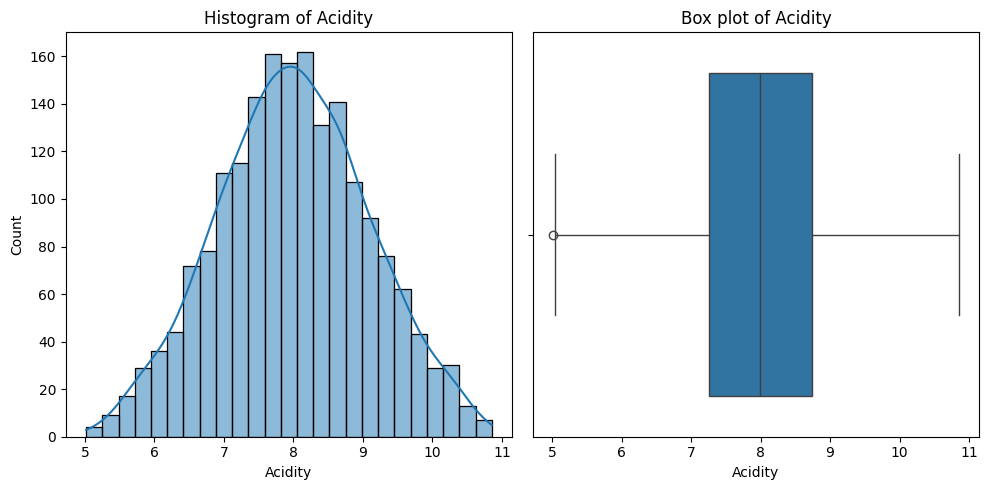

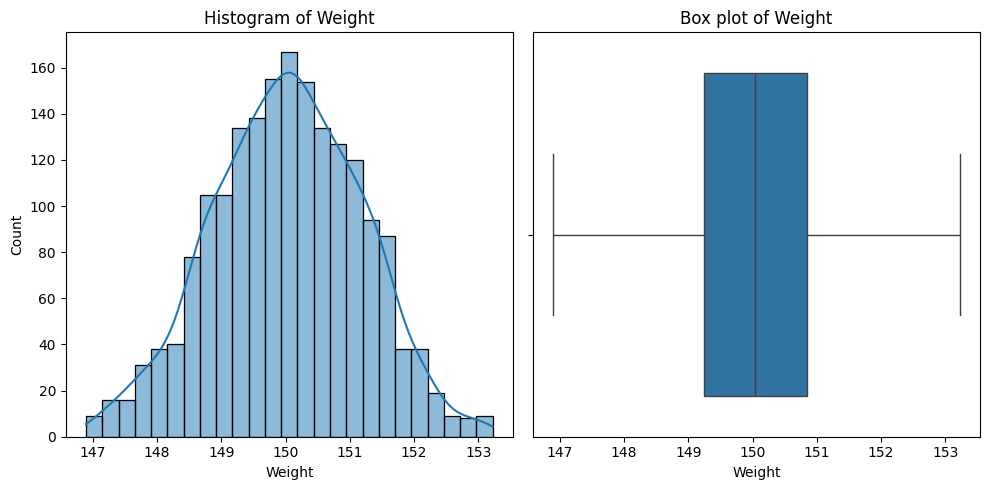

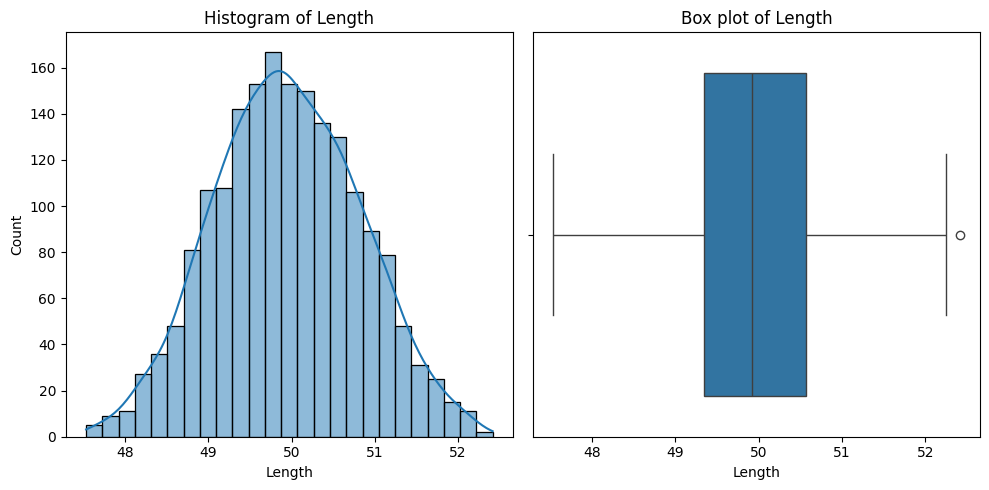

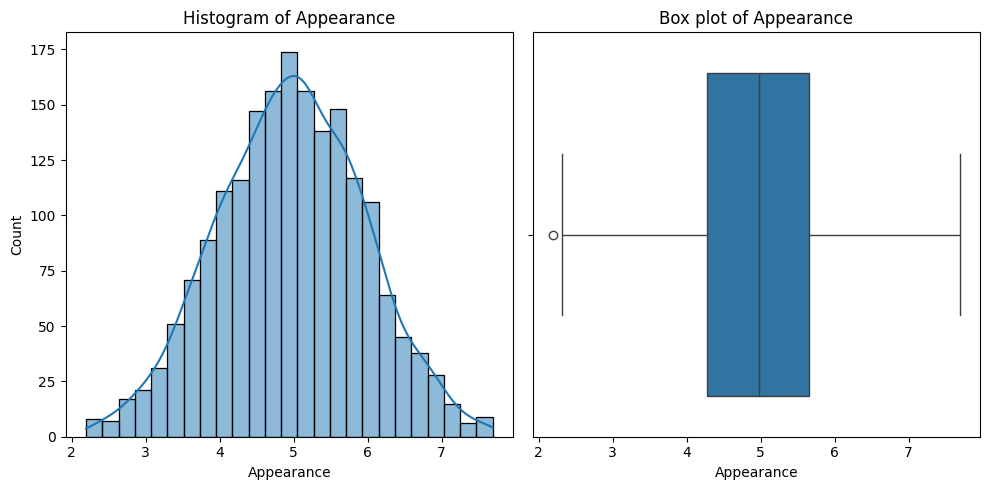

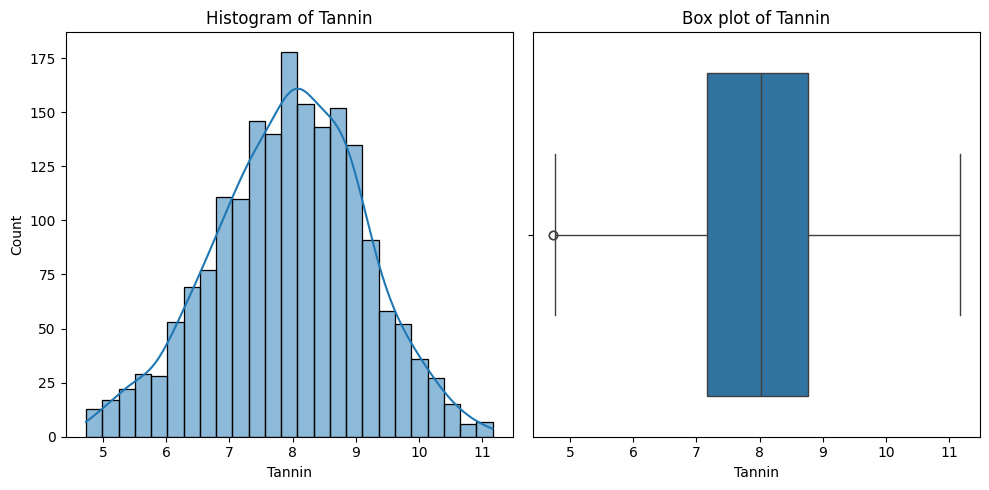

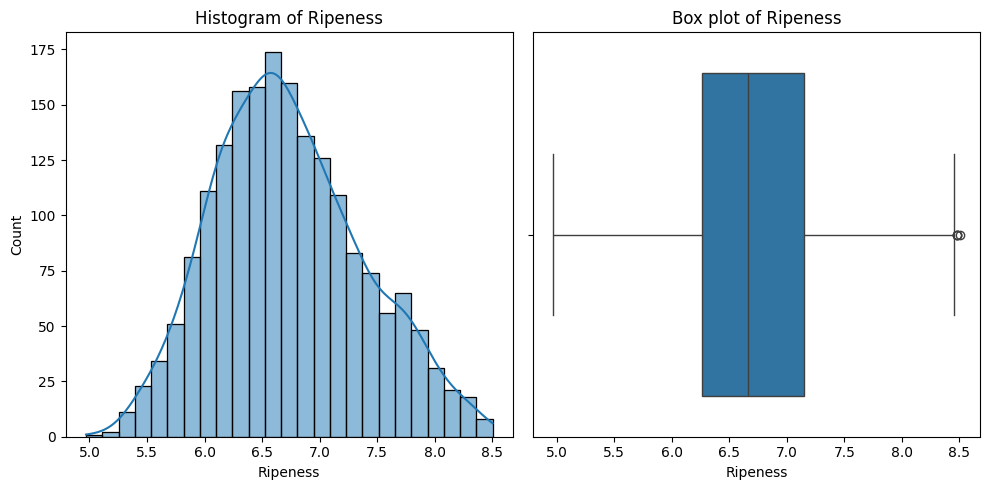

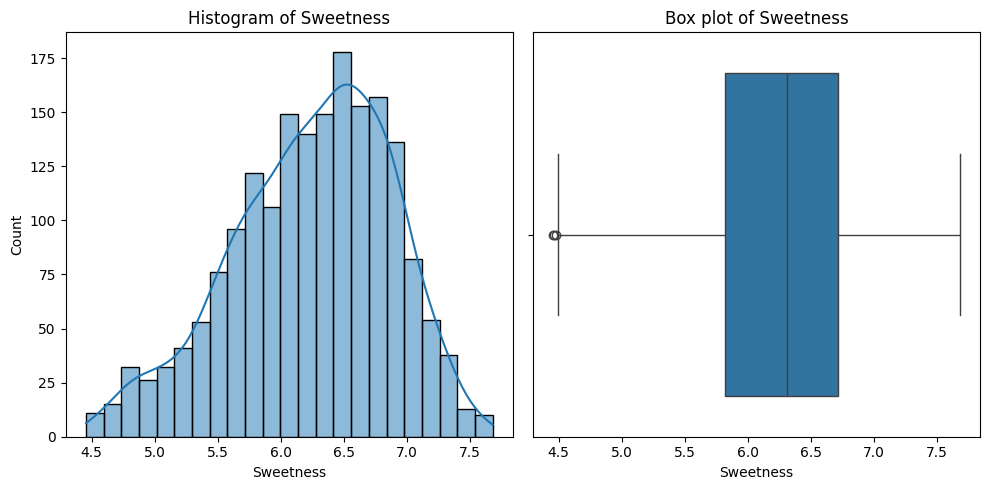

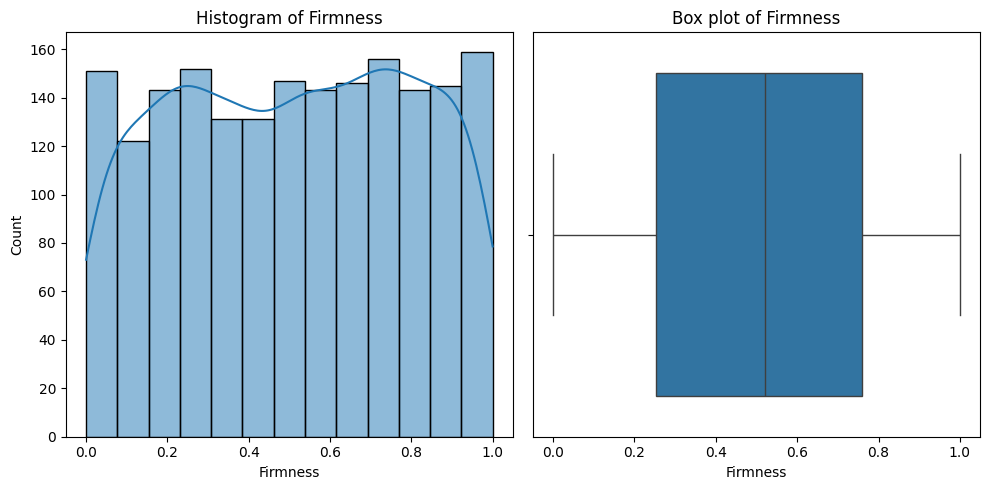

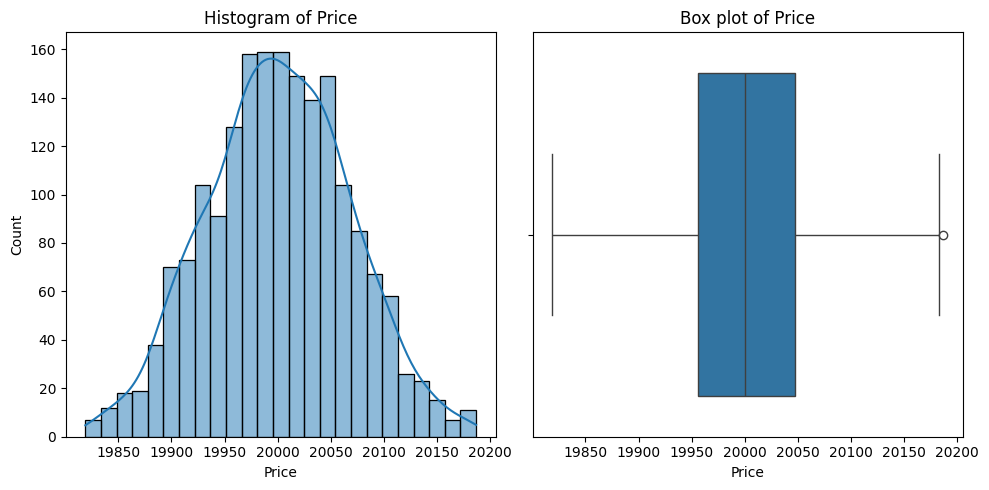

In [8]:
# DataFrame numerik
for col in df_num.columns:
  plt.figure(figsize=(10, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df_num[col], kde=True)
  plt.title(f'Histogram of {col}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_num[col], orient='h')
  plt.title(f'Box plot of {col}')

  plt.tight_layout()
  plt.show()

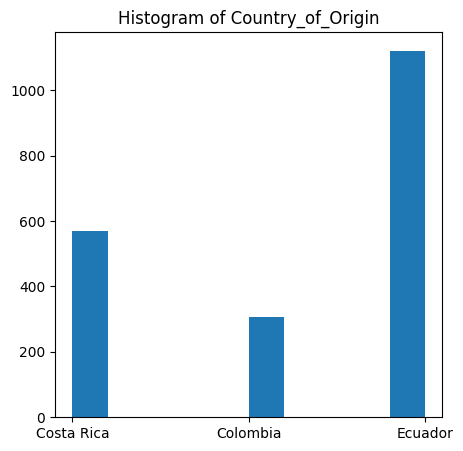

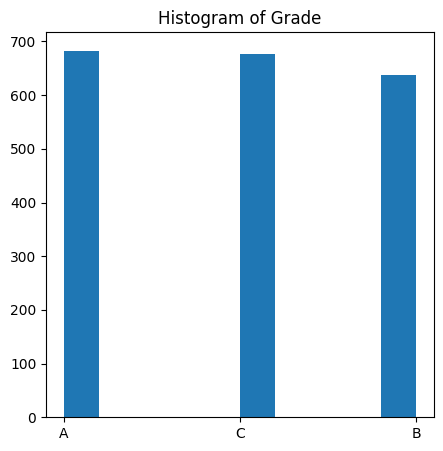

In [9]:
# DataFrame string
for col in df_str.columns:
  plt.figure(figsize=(5, 5))

  # Histogram
  plt.hist(df_str[col], bins=10)
  plt.title(f'Histogram of {col}')

  plt.show()

# Nomor 4

In [10]:
for column in df_num.columns:
  # stat, p = kstest(df_num[column], 'norm')
  stat, p = shapiro(df_num[column])
  alpha = 0.05
  if p > alpha:
      print(f'Kolom {column} terdistribusi normal')
  else:
      print(f'Kolom {column} tidak terdistribusi normal')

Kolom Acidity tidak terdistribusi normal
Kolom Weight tidak terdistribusi normal
Kolom Length tidak terdistribusi normal
Kolom Appearance terdistribusi normal
Kolom Tannin tidak terdistribusi normal
Kolom Ripeness tidak terdistribusi normal
Kolom Sweetness tidak terdistribusi normal
Kolom Firmness tidak terdistribusi normal
Kolom Price tidak terdistribusi normal
